In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(X_train.shape)  # (60000, 28, 28)
print(X_test.shape)  # (10000, 28, 28)
print(X_train[0].dtype)  # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

# smoothing
Each image of (1, 28, 28) is converted to (1, 784). The machine learning methods we have learned so far and the neural networks we will be working with in this article, which only have an all-connected layer, will be handled in this form. The fact that all pixels are in a row is called “flattened”.



In [ ]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

As we have been learning about machine learning, we have referred to the number of features as “dimensions”. From that perspective, MNIST is 784 dimensional data. On the other hand, the state where the NumPy shape is (784,) is also called a 1-dimensional array. If the state of (28, 28) has the information of height and width as an image, it is a 2-dimensional array. From this perspective, the data is two-dimensional. Furthermore, if it is a color image, then it is (28, 28, 3), which is a 3-dimensional array. In the previous viewpoint, the data is 3-dimensional. However, from the perspective that both black-and-white and color images are flat images and not three-dimensional data, they are two-dimensional data. Note that the word “dimension” is thus used with multiple connotations when dealing with image data.

Visualization of image data
Visualize image data. Pass toplt.imshow.

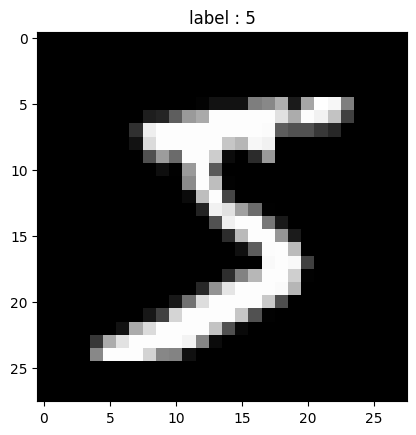

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Image data is typically held in unsigned 8-bit integer type uint8, but plt.imshowcan display a more flexible array as an image. For example, a floating point of type float64 with negative values as shown below will not cause an error and will be displayed in exactly the same way as before.



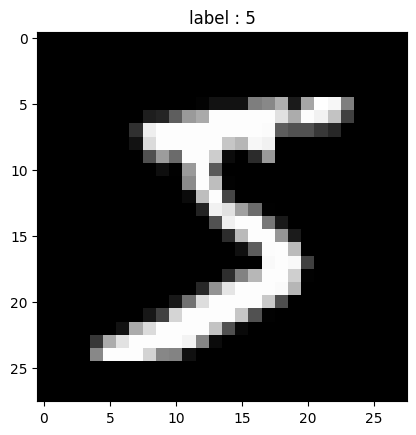

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [ ]:
index = 0
image = X_train[index].reshape(28, 28)
image = image.astype(np.float64)  # Convert to float type
image -= 105.35  # Intentionally try to create a negative decimal value
plt.imshow(image, "gray")
plt.title("label : {}".format(y_train[index]))
plt.show()
print(image)  # Check the value

This is because it is designed to automatically convert the value to an integer between 0 and 255 and process it; even if it is of type uint8, if the minimum value is not 0 and the maximum value is not 255, the tint will be wrong. To prevent this, include the following argument

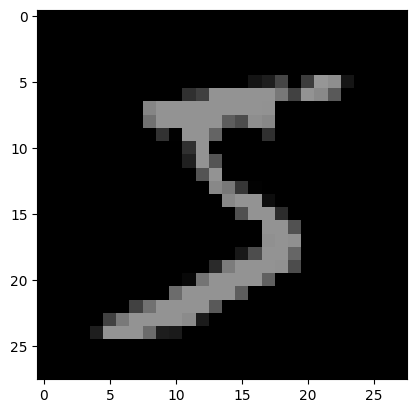

In [ ]:
plt.imshow(image, "gray", vmin=0, vmax=255)

This automatic scaling in image-related libraries can produce unexpected results, so check when using new methods.

pretreatment
Images are represented as uint8 type from 0 to 255, but for machine learning, they are handled as float type from 0 to 1. The following code can be used for conversion.



In [ ]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255
print(X_train.max())  # 1.0
print(X_train.min())  # 0.0

1.0
0.0


Also, although the correct answer labels are integers from 0 to 9, they are converted to one-hot expressionswhen performing multi-class classification in a neural network.
The code using
OneHotEncoderof scikit-learn is as follows. Because the value by this one-hot expression indicates the probability of being the label, it is treated as a float type.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


Furthermore, 20% of the 60,000 sheets of training data should be divided as verification data. There will be 48,000 sheets of training data and 12,000 sheets of verification data.



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape)  # (48000, 784)
print(X_val.shape)  # (12000, 784)


(48000, 784)
(12000, 784)


# 3.Neural network scratch
We will create a neural network class from scratch, using only minimal libraries such as NumPy to implement the algorithm.

This time we will create a 3-layer neural network that performs multi-class classification. We will learn the basics of neural networks with the number of layers fixed. We will make a design that can freely change the layers in the next Sprint.

A template is provided below. Please add your code to this ScratchSimpleNeuralNetrowkClassifier class.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, n_nodes1, n_nodes2, lr=0.1, epoch=5, batch_size=20, sigma=0.01, activation_func="sigmoid", verbose = True):
        self.verbose = verbose
        self.params = {}
        self.bias = {}

        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
        self.sigma = sigma

        self.train_loss = []
        self.val_loss = []

        if activation_func == "sigmoid":
            self.forward_activation_func = self._sigmoid_forward
            self.backward_activation_func = self._sigmoid_backward
        elif activation_func == "tanh":
            self.forward_activation_func = self._tanh_forward
            self.backward_activation_func = self._tanh_backward
        else:
            raise ValueError("No exists such activation function !!")


    def fit(self, X, y, X_val=None, y_val=None):

       ## Whether to record the loss function of verification data
        calc_val = (X_val is not None) & (y_val is not None)

        ## One_hot conversion of objective variable
        y = self._one_hot_encoding(y)
        if calc_val:
            y_val = self._one_hot_encoding(y_val)

        ## Initial value parameter set
        self._set_parameters(X, y)

        ## Mini batch object definition
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)

        ## Learning
        for ep in range(self.epoch):
            for mini_X, mini_y in get_mini_batch:
                ## Forward propagation
                ## 1 Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A1 = mini_X @ self.params["W1"] + self.bias["b1"]
                Z1 = self.forward_activation_func(A1)
                ## 1 Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A2 = Z1 @ self.params["W2"] + self.bias["b2"]
                Z2 = self.forward_activation_func(A2)
                ## 3 Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                A3 = Z2 @ self.params["W3"] + self.bias["b3"]
                Z3 = self._softmax(A3)
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

               ## Backpropagation
                ## 3 Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA3 = Z3 - mini_y
                deltaB3 = np.sum(deltaA3, axis=0)
                deltaW3 = Z2.T @ deltaA3

                self.params["W3"] -= self.lr * deltaW3
                self.bias["b3"] -= self.lr * deltaB3

                deltaZ2 = deltaA3 @ self.params["W3"].T

                ## ② Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA2 = deltaZ2 * self.backward_activation_func(A2)
                deltaB2 = np.sum(deltaA2, axis=0)
                deltaW2 = Z1.T @ deltaA2

                self.params["W2"] -= self.lr * deltaW2
                self.bias["b2"] -= self.lr * deltaB2

                deltaZ1 = deltaA2 @ self.params["W2"].T
                ## ① Layer＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
                deltaA1 = deltaZ1 * self.backward_activation_func(A1)
                deltaB1 = np.sum(deltaA1, axis=0)
                deltaW1 = mini_X.T @ deltaA1

                self.params["W1"] -= self.lr * deltaW1
                self.bias["b1"] -= self.lr * deltaB1
                #＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

            ## Record of loss
            tr_loss = self._cross_entropy(self.predict_prob(X), y)
            self.train_loss.append(tr_loss)

            if self.verbose:
                    print("Train loss of epoch {}: {}".format(ep, tr_loss))

            if calc_val:
                va_loss = self._cross_entropy(self.predict_prob(X_val), y_val)
                self.val_loss.append(va_loss)


    def predict_prob(self, X):
        ## Forward propagation
        ## 1 Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A1 = X @ self.params["W1"] + self.bias["b1"]
        Z1 = self.forward_activation_func(A1)
        ## 2 Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A2 = Z1 @ self.params["W2"] + self.bias["b2"]
        Z2 = self.forward_activation_func(A2)
        ## 3 Hierarchy＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
        A3 = Z2 @ self.params["W3"] + self.bias["b3"]
        y = self._softmax(A3)
        ##＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

        return y

    def predict(self, X):
        y = np.argmax(self.predict_prob(X), axis=1)

        return y

    def _set_parameters(self, X, y):
        ## Set the number of features and the number of classes
        self.n_features = X.shape[1]
        self.n_output = y.shape[1]

        ## Initial weight
        self.params["W1"] = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.params["W2"] = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.params["W3"] = self.sigma * np.random.randn(self.n_nodes2, self.n_output)

       ## Bias initial value
        self.bias["b1"] = self.sigma * np.random.randn(1, self.n_nodes1)
        self.bias["b2"] = self.sigma * np.random.randn(1, self.n_nodes2)
        self.bias["b3"] = self.sigma * np.random.randn(1, self.n_output)

    def _sigmoid_forward(self, X):
        return 1 / (1 + np.exp(-X))

    def _tanh_forward(self, X):
        return np.tanh(X)

    def _sigmoid_backward(self, X):
        return (1-self._sigmoid_forward(X)) * self._sigmoid_forward(X)

    def _tanh_backward(self, X):
        return (1 - self._tanh_forward(X)**2)

    def _softmax(self, X):
        X = X - np.max(X)
        return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)

    def _one_hot_encoding(self, y):
        enc = OneHotEncoder(handle_unknown='ignore')
        y_one_hot = enc.fit_transform(y[:, np.newaxis]).toarray() # Convert sparse matrix to dense array
        return y_one_hot

    def _cross_entropy(self, X, y):
        batch_size = len(X)
        delta = 1e-7
        return -np.sum(y * np.log(X+delta)) / batch_size

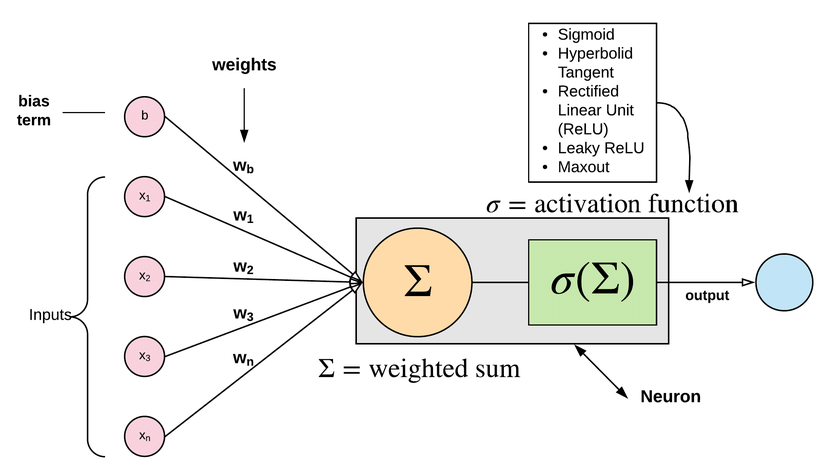

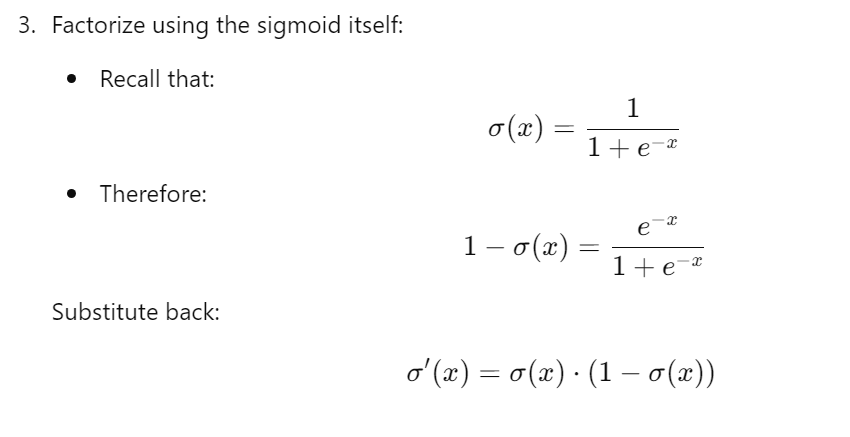

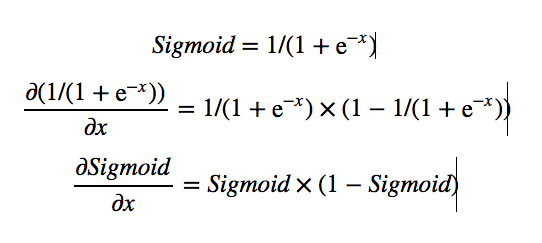

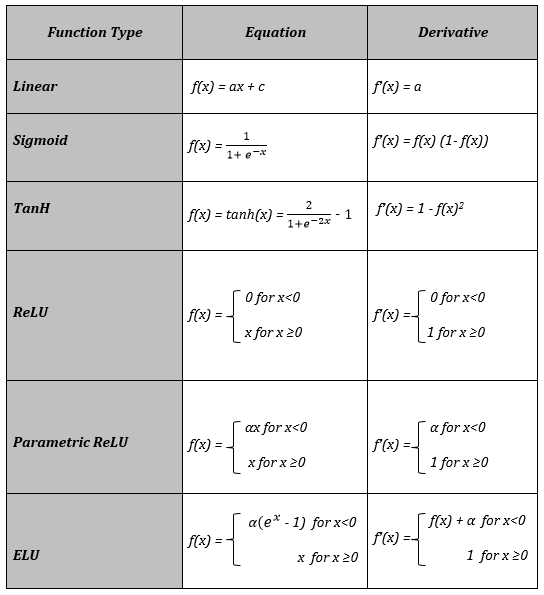

# mini-batch processing
Previous machine learning scratches calculated all the samples at once.
However, in neural networks, the
the stochastic gradient descentmethod, in which data is divided and input, is common.
The group when divided is called a
mini-batch, and the number of samples is called a Batch size.

In this case, the batch size is set to 20. Since the training data used this time is 48,000 sheets, 48,000 divided by 20 means that 2400 updates will be repeated.In neural networks, this is called 2400
times iterationOnce all the training data is viewed, one epochis over. This epoch is repeated multiple times to complete training.

We have a simple iterator to accomplish this. Call it with a for statement to get a mini-batch.

In [ ]:
class GetMiniBatch:
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X :The following form ndarray, shape (n_samples, n_features)
      Training data
    y : The following form ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int64)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
      if self._counter >= self._stop:
          raise StopIteration()
      p0 = self._counter*self.batch_size
      p1 = self._counter*self.batch_size + self.batch_size
      self._counter += 1
      return self._X[p0:p1], self._y[p0:p1]

In [ ]:
nn = ScratchSimpleNeuralNetrowkClassifier(400,200, epoch=50,lr=1e-3)
nn.fit(X_train, y_train, X_test, y_test)

Train loss of epoch 0: 2.306328878251347
Train loss of epoch 1: 2.306223098929844
Train loss of epoch 2: 2.303758358692551
Train loss of epoch 3: 2.2314550064823093
Train loss of epoch 4: 1.5291633243118685
Train loss of epoch 5: 1.1439729041858029
Train loss of epoch 6: 0.8064138102205487
Train loss of epoch 7: 0.7116312003627611
Train loss of epoch 8: 0.6414875563525482
Train loss of epoch 9: 0.5748764629885448
Train loss of epoch 10: 0.5238729615735466
Train loss of epoch 11: 0.48591515878863456
Train loss of epoch 12: 0.4524227420106821
Train loss of epoch 13: 0.41881088979613645
Train loss of epoch 14: 0.3878540609878527
Train loss of epoch 15: 0.3638290219132751
Train loss of epoch 16: 0.3452871350161404
Train loss of epoch 17: 0.3298239407420233
Train loss of epoch 18: 0.3162030059008596
Train loss of epoch 19: 0.3038592113369752
Train loss of epoch 20: 0.29248314303981626
Train loss of epoch 21: 0.2818566418915308
Train loss of epoch 22: 0.27181098334260845
Train loss of epoch 

In [ ]:
y_pred = nn.predict(X_test)
print("pred:", y_pred)
print("ans:", y_test)
print("accuracy score:", accuracy_score(y_test, y_pred))

pred: [7 2 1 ... 4 5 6]
ans: [7 2 1 ... 4 5 6]
accuracy score: 0.9586


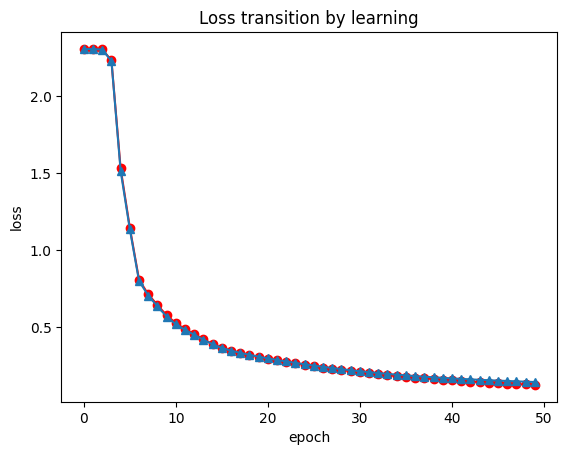

In [ ]:
plt.plot(nn.train_loss, marker="o", label="train_loss", c= "red")
plt.plot(nn.val_loss, marker="^", label="val_loss")
plt.title("Loss transition by learning")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
nn.train_loss

[np.float64(2.306328878251347),
 np.float64(2.306223098929844),
 np.float64(2.303758358692551),
 np.float64(2.2314550064823093),
 np.float64(1.5291633243118685),
 np.float64(1.1439729041858029),
 np.float64(0.8064138102205487),
 np.float64(0.7116312003627611),
 np.float64(0.6414875563525482),
 np.float64(0.5748764629885448),
 np.float64(0.5238729615735466),
 np.float64(0.48591515878863456),
 np.float64(0.4524227420106821),
 np.float64(0.41881088979613645),
 np.float64(0.3878540609878527),
 np.float64(0.3638290219132751),
 np.float64(0.3452871350161404),
 np.float64(0.3298239407420233),
 np.float64(0.3162030059008596),
 np.float64(0.3038592113369752),
 np.float64(0.29248314303981626),
 np.float64(0.2818566418915308),
 np.float64(0.27181098334260845),
 np.float64(0.2622254669648794),
 np.float64(0.25302750306970057),
 np.float64(0.24418414697289859),
 np.float64(0.2356884287776944),
 np.float64(0.22754643815705258),
 np.float64(0.21976799044034506),
 np.float64(0.21236072448041787),
 np.

In [ ]:
nn.val_loss

[np.float64(2.305297464621925),
 np.float64(2.3051111807803237),
 np.float64(2.302473253628204),
 np.float64(2.228513395611733),
 np.float64(1.5137156584568272),
 np.float64(1.134475880032302),
 np.float64(0.7978981780269399),
 np.float64(0.7036215667731751),
 np.float64(0.6334895289892323),
 np.float64(0.5668465904808774),
 np.float64(0.516741477925924),
 np.float64(0.4803861782956894),
 np.float64(0.44859939406110017),
 np.float64(0.4163598840243641),
 np.float64(0.3863423306606106),
 np.float64(0.3631286481980372),
 np.float64(0.3454503400373301),
 np.float64(0.3307822967109469),
 np.float64(0.31779520672133393),
 np.float64(0.30592409773742935),
 np.float64(0.29490792756872736),
 np.float64(0.2845872550623794),
 np.float64(0.2748392130158579),
 np.float64(0.2655693287131497),
 np.float64(0.2567152668680775),
 np.float64(0.24824488787944307),
 np.float64(0.24014841486652502),
 np.float64(0.23242909465011108),
 np.float64(0.2250950100336583),
 np.float64(0.21815310722117964),
 np.flo

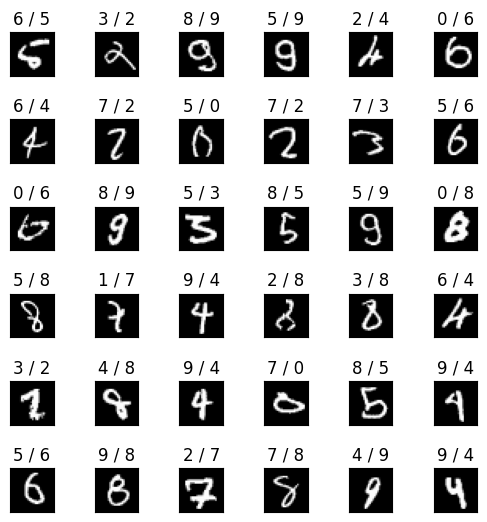

In [ ]:
y_val = y_test

"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".

Parameters:
----------
y_pred : Estimated value ndarray (n_samples,)
y_val : Correct label for validation data (n_samples,)
X_val : Features of verification data（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # How many to display
true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int64)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')

In [ ]:
def sigmoid_forwarrd(X):
    return 1 / (1 + np.exp(-X))

def tanh_forwarrd(X):
    return np.tanh(X)

def sigmoid_backward(X):
    return (1- sigmoid_forwarrd(X)) * sigmoid_forwarrd(X)

def tanh_backward(X):
    return (1 - tanh_forwarrd(X)**2)

def softmax(X):
    return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)

def cross_entropy(X, y):
    batch_size = len(X)
    delta = 1e-7
    return -np.sum(y * np.log(X+delta)) / batch_size


In [ ]:
XX = np.array([[1,2],[3,4],[5,6],[7,8]])
yy = np.array([0,1,2,3])

enc = OneHotEncoder(handle_unknown='ignore')
yy_one_hot = enc.fit_transform(yy[:, np.newaxis])

n_nodes1 = 3
n_nodes2 = 2
n_output = yy_one_hot.shape[1]
n_features = XX.shape[1]

bias1 = np.array([-20, -10, -12])
bias2 = np.array([10, 15])
bias3 = np.array([10, 15, -10, -5])

w1 = np.array([[5, 3, 1], [4, 2, 0]])
w2 = np.array([[-4, 3], [-6, 1], [-8, 5]])
w3 = np.array([[-4, 3, -3, 5], [-6, 1, -2, 2]])

A1 = XX @ w1 + bias1
Z1 = sigmoid_forwarrd(A1)

A2 = Z1 @ w2 + bias2
Z2 = sigmoid_forwarrd(A2)

A3 = Z2 @ w3 + bias3
Z3 = softmax(A3)

Z2.T @ (Z3 - yy_one_hot)

w3 - 0.1 *(Z2.T @ (Z3 - yy_one_hot))

matrix([[-3.90000609,  2.80152655, -2.9501822 ,  5.04866174],
        [-5.90000009,  0.7000001 , -1.9       ,  2.09999999]])

In [ ]:
## 1st layer
deltaA3 = Z3 - yy_one_hot
deltaB3 = np.sum(deltaA3, axis=0)
deltaW3 = Z2.T @ deltaA3
deltaZ2 = deltaA3 @ w3.T

## 2nd layer
#deltaA2 = deltaZ2 * sigmoid_backward(A2)
deltaB2 = np.sum(deltaA2, axis=0)
deltaW2 = Z1.T @ deltaA2
deltaZ1 = deltaA2 @ w2.T

## 3rd layer
deltaA1 = deltaZ1 * sigmoid_backward(A1)
deltaB1 = np.sum(deltaA1, axis=0)
deltaW1 = XX.T @ deltaA1

In [ ]:
print("1st layer")
print(deltaA3.shape)
print(deltaB3.shape)
print(deltaW3.shape)
print(deltaZ2.shape)
print(w3 - 0.1 * deltaW3)
print()
print("Second layer")
#print(deltaA2.shape)
print(deltaB2.shape)
print(deltaW2.shape)
print(deltaZ1.shape)
print()
print("Third layer")
print(deltaA1.shape)
print(deltaB1.shape)
print(deltaW1.shape)

1st layer
(4, 4)
(1, 4)
(2, 4)
(4, 2)
[[-3.90000609  2.80152655 -2.9501822   5.04866174]
 [-5.90000009  0.7000001  -1.9         2.09999999]]

Second layer
(2,)
(3, 2)
(4, 3)

Third layer
(4, 3)
(3,)
(2, 3)
